#**Exploratory Data Analysis** on data set **"Indian Premier League"**


### ***Analysis by: Sawi Sharma***

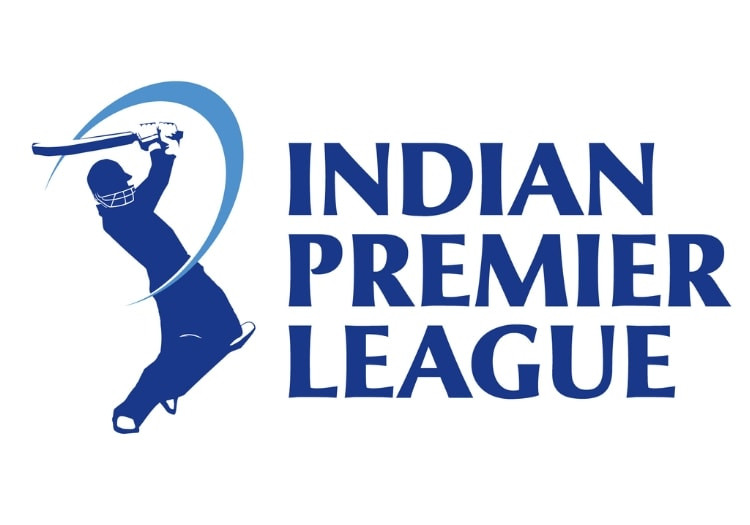

DESCRIPTION : In this notebook i am going to analyse and draw insights from the statistical data of "Indian Premier League". During the analysis I have taken the data of the matches played between 2008 and 2019.
This format of cricket is quite popular in india and has very high brand value.



AIMS OF ANALYSIS: 


1.   To find out the most successful team during the tournament.
2.   Most successful player during the tournament.
3.   different factors contributing to the win or loss of a team
4.   Suggesting teams and players a company should endorse for its products.
     
     and much more.



DATA SETS USED :  matches.csv

### Step 1 : importing all the utilities and libraries

In [1]:
from __future__ import print_function     #for backwards version compatibilities

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline                        
#so that we obtain the plots within the lines of the code 

### Step 2 : Uploading and reading the dataset

In [3]:
#uploading csv file to google colab
from google.colab import files
uploaded=files.upload()

Saving matches.csv to matches.csv


In [4]:
#reading the csv file to pandas dataframe
data=pd.read_csv("matches.csv")
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


So in the above dataset, we can see that there are 756 rows and 18 columns. From here we can say that there were total 756 IPL matches were played between 2008 and 2019. Also, there are 18 information points available about each match.

### Step 3 : Checking and cleaning the data

In [5]:
#now checking the "health" of the data, whether all fields are completely filled or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

So we can infer about the data that there are 5 columns (info points) in the table of integer type and 13 columns are of type object (the strings in pandas dataframe)

In [6]:
data.isnull()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
754,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

we can see from the above description that there are so many NULL values in umpire3 column. Also, this column is not so significant for our analysis. So I am dropping this column as of now.

Also some other columns also have some null values, but thankfully they are all of object type (the pandas' strings). So they will not create much problem and we can simply replace them with "Not Known" for better representation.

In [8]:
data=data.drop(columns=["umpire3"],axis=1)
#axis=1 for columns in pandas dataframe (as we intend to remove the whole column here)

In [9]:
#filling all the null values
data["city"].fillna("Not Known", inplace=True)
data["winner"].fillna("Not Known", inplace=True)
data["player_of_match"].fillna("Not Known", inplace=True)
data["umpire1"].fillna("Not Known", inplace=True)
data["umpire2"].fillna("Not Known", inplace=True)

data


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Not Known,Not Known
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Not Known,Not Known
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


Now the data is all clean and complete, now we can start our analysis.

### Step 4 : Taking the overview of the data and cursory observations

In [10]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


From the above description, we can conclude that:


1.   The largest winning of a team by wickets is by 10 wickets (score achieved without loosing a single wicket).
2.   The biggest winning of a team by runs scored is by 146 runs (whole of the batting sequence collapsed 146 runs off the victory).
3.   75% of the teams win by run with the margin of 19 runs.
4.   75% of the teams win by the margin of 6 wickets.
5.   75% of the totals wins in the tournament were acieved in the year 2016.




## Visualisation and exploratory analysis of data.

### Finding the team with most number of victories in the tournament till 2019.

In [11]:
# first we need to check number of wins of each team in every season
win_per_season=data.groupby("season")["winner"].value_counts()
win_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
        Not Known                       1
Name: winner, Length: 103, dtype: int64

In [12]:
#creating a separate small dataset for plotting and visualisation
year=2008
win_per_season_ds=pd.DataFrame(columns=["year", "team","wins"])
for i in win_per_season.iteritems():
  if i[0][0]==year:
    print(i)
    win_series=pd.DataFrame({"year":[i[0][0]],
                             "team":[i[0][1]],
                             "wins":i[1]})
    win_per_season_ds=win_per_season_ds.append(win_series)
    year+=1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [13]:
win_per_season_ds

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


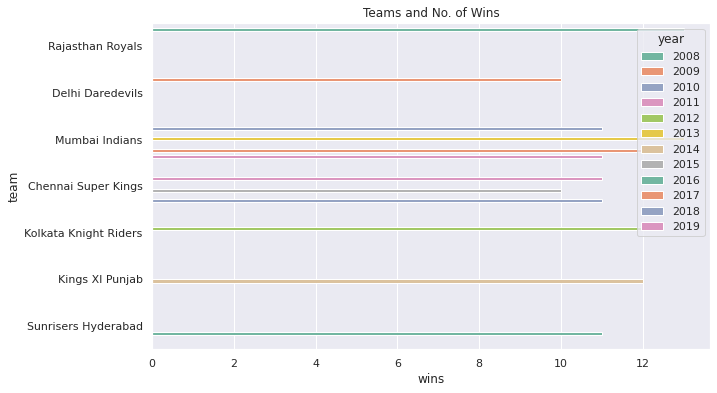

In [31]:
#plotting a bar plot for better visualisation using seaborn library
plt.title("Teams and No. of Wins")
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot("wins", "team",hue='year', data=win_per_season_ds, palette='Set2')

From the above given barplot, we can clearly deduce that Mumbai Indian team has scored maximum wins, followed by Chennai Super Kings, till 2019.


###**Now we have got answer to one of the questions: Which team should a company endorse for its products?**

So the best answer for this question is, either Mumbai Indians or Chennai Super Kings, because both the teams have a good track record of indevidual wins and overall tournament wins. More wins suggest that a team will be there for long time in the game for a particular season, so a company can harness more with longer presence in the season.

Another question asked was:
### **Which team has won the title for most of the times?**
The answer to this questions is "Mumbai Indians".

### Finding the most valuable players of the tournament.

Next step is to find the "players" that a company should endorse for its products. 

In [30]:
#finding the sequence of the most valuble players in the IPL tournament 
mvp_data = data['player_of_match'].value_counts()

top10_mvp_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for i in mvp_data.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[i[0]],
            'wins':[i[1]]
        })
        top10_mvp_df = top10_mvp_df.append(temp_df2, ignore_index=True)
        count += 1   

#printing the created dataframe
top10_mvp_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


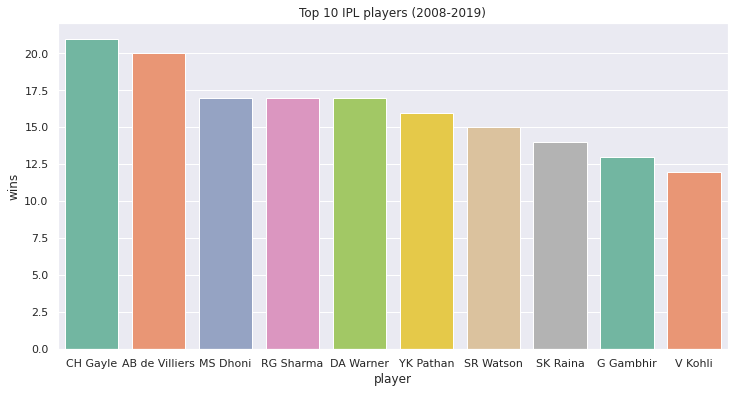

In [36]:
#for better visualisation creating a plot
plt.title("Top 10 IPL players (2008-2019)")
sns.set(rc={'figure.figsize':(14,7)})
sns.barplot('player', 'wins', data=top10_mvp_df, palette="Set2")

Now its time to draw some conclusions.

The second question asked was 
###**Which players the company should endorse for their product?**

The answer is that the companies can endorse top 5 players if they have good budget with them. Or, the companies may endorse the players from position 6-10 with limited budgets.

### **Factors contributing to the win or loss of a team?**
The answer to this question is that teams of 6 players oyt of top 10 players has won the IPL trophy atleast once, so we can say that presence of a "player of the match" carries a great importance. 

# **END of analysis**